<a href="https://colab.research.google.com/github/kigit2017/Houe-price-prediction/blob/main/SeoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load csv Bike data into dataframe

In [4]:
data = pd.read_csv('/content/SeoulBikeData.csv')

The data ste has 14 columns and 8760 rows.

In [5]:
data.shape

(8760, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [7]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **Removing outliers in data will improve correlation. Removed holiday data.**

(array([0, 1]), [Text(0, 0, 'No Holiday'), Text(1, 0, 'Holiday')])

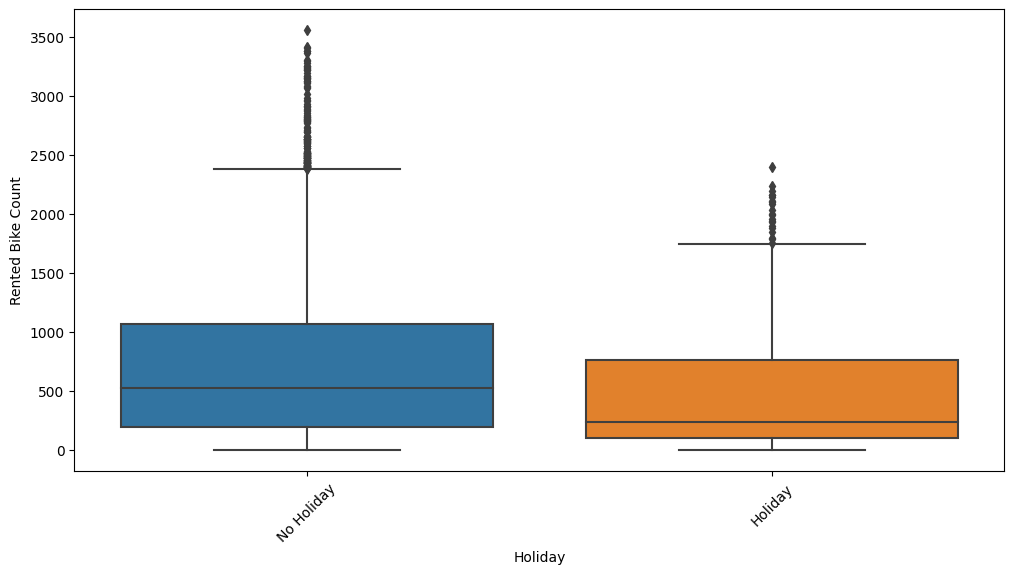

In [8]:
import seaborn as sns

plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Holiday', y='Rented Bike Count', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)



In [9]:
data.head()
data = data[data['Holiday']=='No Holiday']
data = data[data['Functioning Day']=='Yes']
#data = data[data['Holiday']=='No Holiday']
data

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Filter out numerical values

In [10]:
df = data.select_dtypes(include =['float64','int64'])
df.shape
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


Get info to get the mean ,std, quartile values.

All column count are the same. There should be no missing values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8057 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8057 non-null   int64  
 1   Hour                      8057 non-null   int64  
 2   Temperature(C)            8057 non-null   float64
 3   Humidity(%)               8057 non-null   int64  
 4   Wind speed (m/s)          8057 non-null   float64
 5   Visibility (10m)          8057 non-null   int64  
 6   Dew point temperature(C)  8057 non-null   float64
 7   Solar Radiation (MJ/m2)   8057 non-null   float64
 8   Rainfall(mm)              8057 non-null   float64
 9   Snowfall (cm)             8057 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 692.4 KB


Describe the dataset to find the min,maximum of bike count.
Solar Radiation,Rainfall and Snowfall have outliers present in the data, because the maximum - 75 % is higher and  farther from the mean.

In [12]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,739.284970,11.507385,12.928969,58.367507,1.718568,1430.829713,4.146506,0.568251,0.152489,0.078888
std,644.004661,6.920834,12.123627,20.408267,1.026413,607.078734,13.223339,0.868472,1.144872,0.452385
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,222.000000,6.000000,3.500000,43.000000,0.900000,940.000000,-4.800000,0.000000,0.000000,0.000000
50%,561.000000,12.000000,13.600000,57.000000,1.500000,1673.000000,4.900000,0.010000,0.000000,0.000000
75%,1094.000000,18.000000,22.800000,74.000000,2.300000,1999.000000,15.400000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Remove missing values from the columns. We checked there are no missing values in the data.**

In [13]:
miss_val=df.isna().sum()
miss_val


Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

## **BoxPlot for more Outliers during non-holidays.
-



(array([0]), [Text(0, 0, 'No Holiday')])

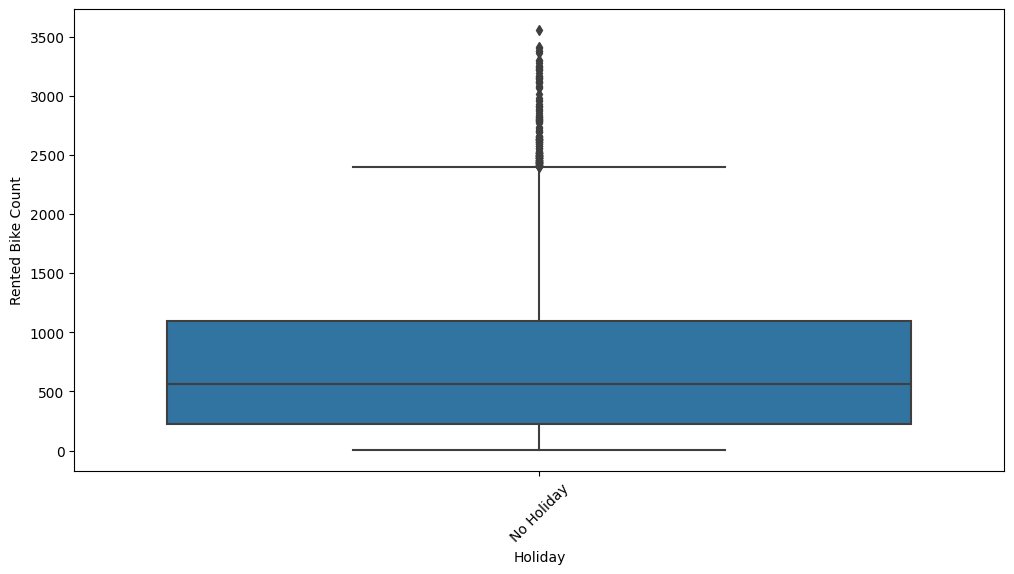

In [14]:
import seaborn as sns

plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Holiday', y='Rented Bike Count', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)



Fill training and test data from dataset  rows

> Indented block



In [15]:
df_train = df[:4380]
df_train.shape
df_test = df[4380:]
df_test.shape

(3677, 10)

Find correlation for bike columns. The features that have higher correlated values affects the bike rent count.

In [16]:
data_corr=data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.431577,0.554128,-0.213049,0.135641,0.221714,0.389934,0.270629,-0.130827,-0.153077
Hour,0.431577,1.000000,0.124200,-0.236478,0.288497,0.105540,0.006762,0.145129,0.014044,-0.018039
Temperature(C),0.554128,0.124200,1.000000,0.163872,-0.025750,0.031521,0.914768,0.356430,0.053462,-0.219920
Humidity(%),-0.213049,-0.236478,0.163872,1.000000,-0.336181,-0.540436,0.537763,-0.459072,0.238280,0.106467
Wind speed (m/s),0.135641,0.288497,-0.025750,-0.336181,1.000000,0.187845,-0.164293,0.324865,-0.023025,-0.003099
Visibility (10m),0.221714,0.105540,0.031521,-0.540436,0.187845,1.000000,-0.175801,0.153652,-0.169955,-0.118061
Dew point temperature(C),0.389934,0.006762,0.914768,0.537763,-0.164293,-0.175801,1.000000,0.101273,0.128401,-0.153656
Solar Radiation (MJ/m2),0.270629,0.145129,0.356430,-0.459072,0.324865,0.153652,0.101273,1.000000,-0.074498,-0.072982
Rainfall(mm),-0.130827,0.014044,0.053462,0.238280,-0.023025,-0.169955,0.128401,-0.074498,1.000000,0.008700
Snowfall (cm),-0.153077,-0.018039,-0.219920,0.106467,-0.003099,-0.118061,-0.153656,-0.072982,0.008700,1.000000


Get correlated values of columns which have values >.6 for rented bike count.There no features that are greatly affecting the bike rental.

In [17]:
data_corr=data_corr['Rented Bike Count'][:-1]
data_corr
data_corr[abs(data_corr)>.4].sort_values(ascending=False)

Rented Bike Count    1.000000
Temperature(C)       0.554128
Hour                 0.431577
Name: Rented Bike Count, dtype: float64

Plot correlation beween the variables using Heat Map.

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 4715
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         4380 non-null   int64  
 1   Hour                      4380 non-null   int64  
 2   Temperature(C)            4380 non-null   float64
 3   Humidity(%)               4380 non-null   int64  
 4   Wind speed (m/s)          4380 non-null   float64
 5   Visibility (10m)          4380 non-null   int64  
 6   Dew point temperature(C)  4380 non-null   float64
 7   Solar Radiation (MJ/m2)   4380 non-null   float64
 8   Rainfall(mm)              4380 non-null   float64
 9   Snowfall (cm)             4380 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 376.4 KB


**Change training data to absolute values.**


In [19]:

#df_train = df_train[['Dew point temperature(C)','Solar Radiation (MJ/m2)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Rented Bike Count']]
df_train = df_train.abs()

In [20]:
from numpy.ma import log10
#df_train['Rainfall(mm)'] = df_train['Rainfall(mm)'] - df_train['Rainfall(mm)'].mean()
#df_train['Temperature(C)'] -= df_train['Temperature(C)'].mean()
#df_train['Humidity(%)'] -= df_train['Humidity(%)'].mean()
#df_train['Dew point temperature(C)'] -= df_train['Dew point temperature(C)'].mean()
#df_train['Solar Radiation (MJ/m2)'] -= df_train['Solar Radiation (MJ/m2)'].mean()
#df_train['Wind speed (m/s)'] -= df_train['Wind speed (m/s)'].mean()
#df_train['Visibility (10m)'] -= df_train['Visibility (10m)'].mean()
#df_train['Snowfall (cm)'] -= df_train['Snowfall (cm)'].mean()


In [21]:
from numpy.ma.core import where

from numpy.ma.extras import median
#df_train.mean(axis=0)['Hour']\
#(df_train['Hour']==0

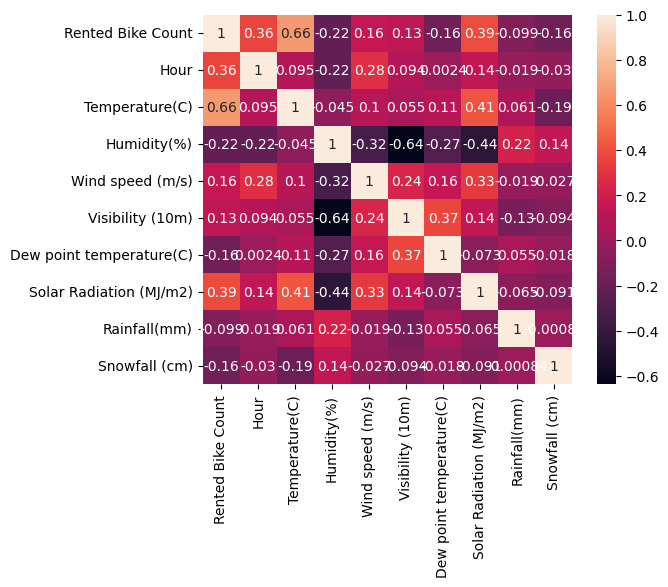

In [22]:
corr = df_train.corr()
sns.heatmap(corr,annot = True,square=True)
plt.show()

Train and test from training data is split 80 20.

In [23]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(df_train,test_size=.20,shuffle=True)

In [24]:
train.shape

(3504, 10)

In [25]:
val.shape

(876, 10)

X,Y values are created with bike_rental count and without the count

In [26]:
train_x = train.drop(['Rented Bike Count'],axis = 1)
train_y = train['Rented Bike Count']

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']


Linear Regression is used for model fitting the data with the training data of x AND y.

In [27]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(train_x,train_y)

LinearRegression()

Predict the value of x FOR TEST and compare it with the expected value of x

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_pred = model1.predict(val_x)



The R2 score is .40 which is lower to the predicted value and the Model Performance on unseen data is lower due to lower correlation.


In [29]:
print(mean_absolute_error(df_pred,val_y))
print(mean_squared_error(df_pred,val_y))
print(r2_score(df_pred,val_y))

247.710197844624
118249.92099742248
0.48332598277096206
